#### **Object Detection using R-CNN in PyTorch**

This module contains 3 modules -

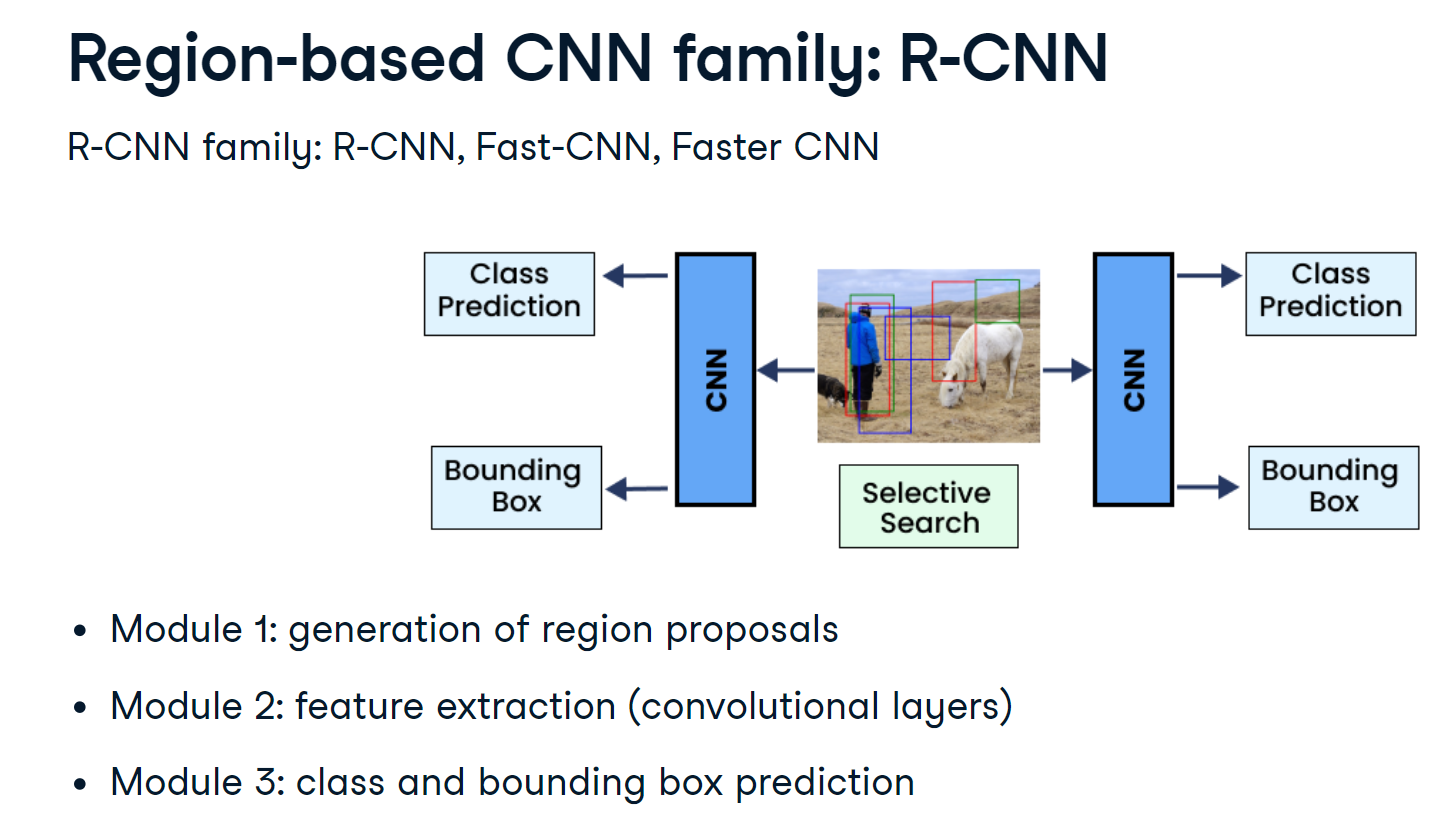

Using pre-trained models as backbones for R-CNN is a common strategy.

What is a backbone?

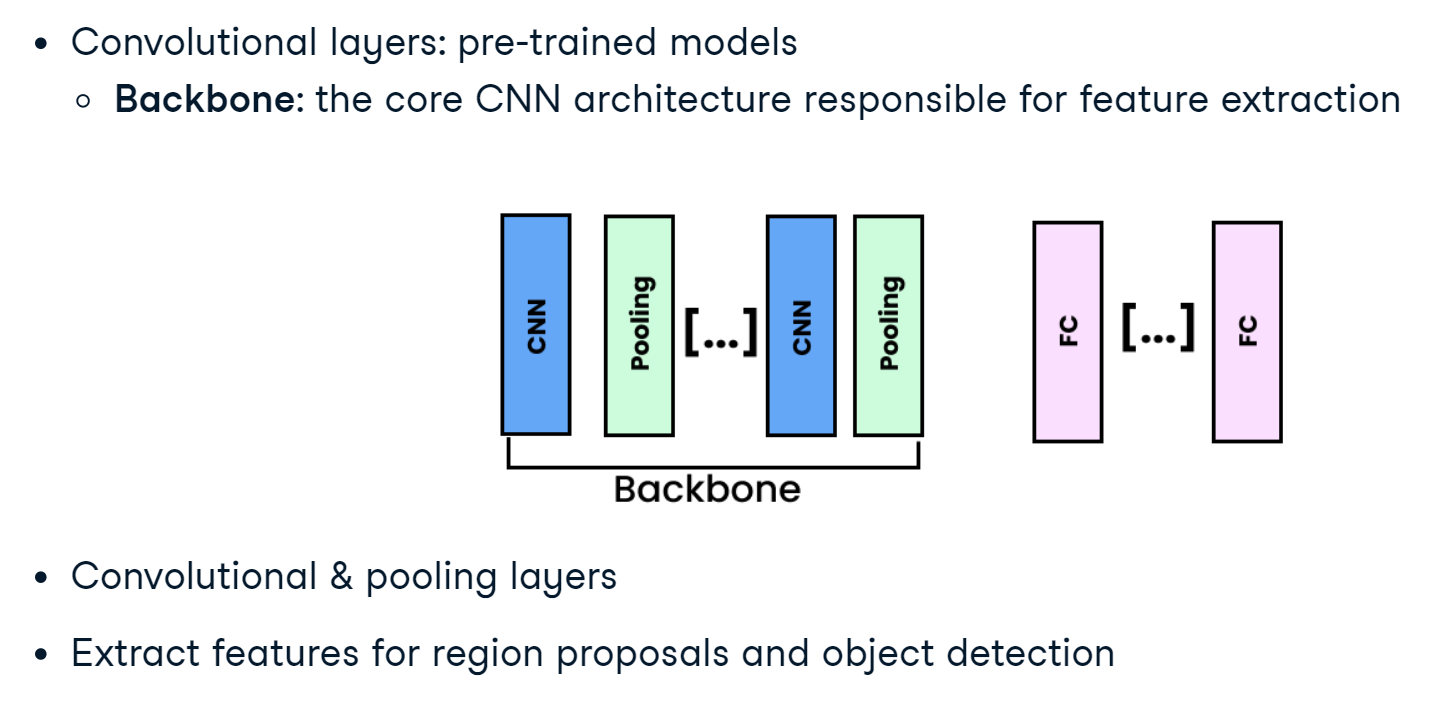

#### Let us look at an example of R-CNN with backbone

In [ ]:
import torch.nn as nn
from torchvision.models import vgg16, VGG16_Weights

vgg = vgg16(weights=VGG16_Weights.DEFAULT)

backbone = nn.Sequential(
    *list(vgg.features.children())   # using only convolutional layers (features) from vgg model, ignoring pooling and classification (fully connected) layers
)

In [ ]:
# Classifier Layer

# extracting backbone's output size
input_dimension = nn.Sequential(*list(
    backbone.classigier.children()
))[0].in_features

# creating a new classifier
classifier = nn.Sequential(
    nn.Linear(input_dimension, 512),
    nn.ReLU(),
    nn.Linear(512, num_classes),
)

In [ ]:
# Box Regressor Layer

# it sits on top of the backbone, so we can use the same 
# input size that we used in the above block

box_regressor = nn.Sequential(
    nn.Linear(input_dimension, 32),
    nn.ReLU(),
    nn.Linear(32, 4), # 4 represents the 4 corner coordinates of the bounding box 
)

#### Object Detection Model

In [ ]:
class ObjectDetectoCNN(nn.Module):
    def __init__(self):
        super(ObjectDetectoCNN, self).__init__()
        
        vgg = vgg16(weights=VGG16_Weights.DEFAULT)
        
        self.backbone = nn.Sequential(*list(vgg.features.children()))
        input_features = nn.Sequential(*list(vgg.classifier.children()))[0].in_features
        
        self.classifier = nn.Sequential(
            nn.Linear(input_features, 512),
            nn.ReLU(),
            nn.Linear(512, 2),
        )
        
        self.box_regressor = nn.Sequential(
            nn.Linear(input_dimension, 32),
            nn.ReLU(),
            nn.Linear(32, 4),
        )
        
    def forward(self, x):
        features = self.backbone(x)
        bboxes = self.regressor(features)
        classes = self.classifier(features)
        return bboxes, classes

#### Object Detection Process Overview

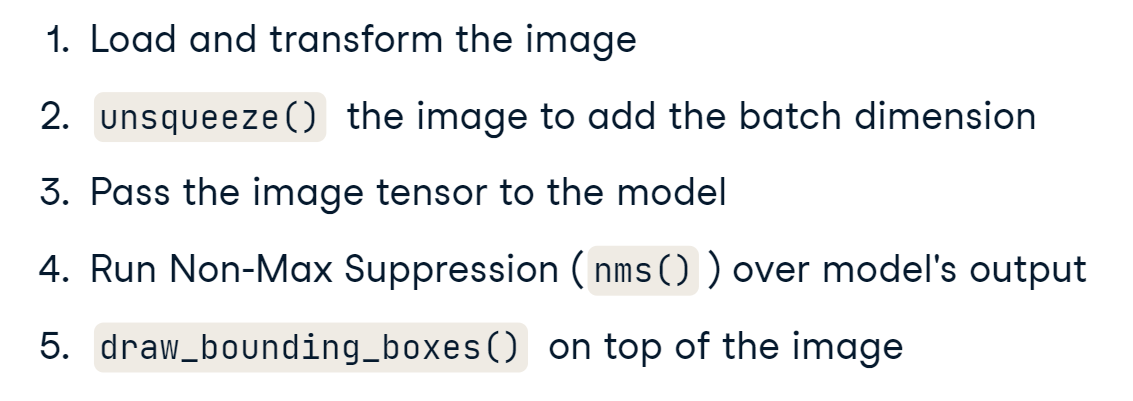

#### Example

In [ ]:
# Load pretrained weights
vgg_model = vgg16(weights=VGG16_Weights.DEFAULT)

# Extract the input dimension
input_dim = nn.Sequential(*list(vgg_model.classifier.children()))[0].in_features

# Create a backbone with convolutional layers 

backbone = nn.Sequential(*list(vgg_model.features.children()))

# Print the backbone model
print(backbone)

Output -
```py
Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (18): ReLU(inplace=True)
  (19): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (20): ReLU(inplace=True)
  (21): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (22): ReLU(inplace=True)
  (23): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (24): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (25): ReLU(inplace=True)
  (26): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (27): ReLU(inplace=True)
  (28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (29): ReLU(inplace=True)
  (30): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
```